# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:

#math
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns






## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#reading csv as dataframes
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#printing heads of each dataframe:
print(sat_2017_df.head(10))      
print(act_2017_df.head(10))


                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both datasets consist of data from each of the 50 states, with ACT 2017 containing an extra data on national participation rates and scores. The data for national participation rates and scores of SAT was not included.  Participation rates for SAT varies across states.



#### 4a. Does the data look complete? 

Answer: No. SAT - index 20 is 52 instead of 524. SAT - percentage sign will make it a string rather than integer. Min of Math in SAT2017 was 52, too low.

ACT
Maryland (index 21) - Science score one digit less, should be 23.2
Wyoming (index 51) - Composite score has a x


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [4]:
#code
#sat_2017_df.set_index(sat_2017_df['State'],inplace=True)

#sat_2017_df: Updating Maryland Math Score to 524
sat_2017_df.loc[(sat_2017_df['State'] == 'Maryland'),'Math'] = 524

#act_2017_df: Update Maryland Science Score to 23.2
act_2017_df.loc[(act_2017_df['State'] == 'Maryland'),'Science'] = 23.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#code
sat_2017_df.info()
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation in sat_2017_df and act_2017_df should be int. Composite in act_2017_df should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [6]:
#defining function to remove % and changes the type to float
def remove_pct_float(value):
    '''This function removes '%' and changes the type from object to float

Parameters:
value (object): 

'''
    
    new_value = float(value.replace('%',''))
    return new_value

#mapping the function to the participation column for each dataframe
sat_2017_df['Participation'] = sat_2017_df['Participation'].map(remove_pct_float)    
act_2017_df['Participation'] = act_2017_df['Participation'].map(remove_pct_float)



- Fix any individual values preventing other columns from being the appropriate type.

In [7]:
#act_2017_df: Update Wyoming Composite Score to 20.2

act_2017_df.loc[(act_2017_df['State'] == 'Wyoming'),'Composite'] = 20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [8]:
#act_2017_df: converting composite column to float
act_2017_df['Composite'] = act_2017_df['Composite'].astype(float)


- Display the data types again to confirm they are correct.

In [9]:
#checking data types
sat_2017_df.info()
act_2017_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading   

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [10]:
#renaming columns of sat2017 using a dictionary
sat_2017_new_columns = {'State':'state','Participation':'sat17_participation','Evidence-Based Reading and Writing':'sat17_read_write','Math':'sat17_math','Total':'sat17_final_score'}
sat_2017_df.rename(columns=sat_2017_new_columns,inplace= True)

#renaming columns of act2017 using a dictionary
act_2017_new_columns = {'State':'state','Participation':'act17_participation', 'English':'act17_english','Math':'act17_math','Reading':'act17_read','Science':'act17_science','Composite':'act17_final_score'}
act_2017_df.rename(columns=act_2017_new_columns,inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [11]:
#act_2017_df: removing "National" row
act_2017_df.drop(index = 0,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [12]:
#Outer join sat_2017_df to act_2017_df using state
act_sat_2017 = pd.merge(sat_2017_df,act_2017_df,on='state',how='outer')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [13]:
#output merged dataframe

act_sat_2017.to_csv('../output/combined_2017.csv', index = False)


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [14]:
#import 2018 data

sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')
act_2018_df.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [15]:
#sat_2018_df: remove '%' from participation column
sat_2018_df['Participation'] = sat_2018_df['Participation'].map(remove_pct_float)

#act_2018_df: convert type to float for participation column
act_2018_df['Average Composite Score'] = act_2018_df['Average Composite Score'].astype(float)


In [16]:
#renaming columns of sat2018 using a dictionary
sat_2018_new_columns = {'State':'state','Participation':'sat18_participation','Evidence-Based Reading and Writing':'sat18_read_write','Math':'sat18_math','Total':'sat18_final_score'}
sat_2018_df.rename(columns=sat_2018_new_columns,inplace= True)

#renaming columns of act2018 using a dictionary
act_2018_new_columns = {'State':'state','Percentage of Students Tested':'act18_participation', 'Average English Score':'act18_english','Average Math Score':'act18_math','Average Reading Score':'act18_read','Average Science Score':'act18_science','Average Composite Score':'act18_final_score'}
act_2018_df.rename(columns=act_2018_new_columns,inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [17]:
#merge act2018 and sat2018 dataframe
act_sat_2018 = pd.merge(sat_2018_df,act_2018_df,on='state',how='outer')

#merge all 2017 and 2018 dataframe into act_sat
final = pd.merge(act_sat_2017,act_sat_2018,on='state',how='outer')

#output combined dataframe
final.to_csv('../output/final.csv', index = False)


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [18]:
#summary statistics of combined dataframe:

final.describe().T


,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_read_write,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_final_score,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_final_score,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [19]:
#function to calculate standard deviation

def calc_stdev(series):
    '''This function calculates the standard deviation of a numpy series
    
    
    '''
    
    n = len(series)
    mean = np.mean(series)
    difference_list = [(x - mean)**2 for x in series]
    stdev = np.sqrt(np.sum(difference_list)/n)
    return stdev
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [20]:
#Code:

sd = {col:calc_stdev(final[col]) for col in final.columns if col != 'state'}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [21]:
np_std = {col:np.std(final[col]) for col in final.columns if col != 'state'}

In [22]:
sd

{'sat17_participation': 34.929070766645076,
 'sat17_read_write': 45.21697020437866,
 'sat17_math': 46.65713364485504,
 'sat17_final_score': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363368,
 'act17_math': 1.9624620273436781,
 'act17_read': 2.046902931484265,
 'act17_science': 1.7222161451443672,
 'act17_final_score': 2.0007860815819893,
 'sat18_participation': 36.946619223539415,
 'sat18_read_write': 47.03460978357609,
 'sat18_math': 47.301945503783536,
 'sat18_final_score': 93.22742384464432,
 'act18_participation': 33.745194881997506,
 'act18_final_score': 2.0855261815801143,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.0157072555557174,
 'act18_read': 2.1458918845104216,
 'act18_science': 1.8516885484833538}

Answer: Manually calculated standard deviation (sd) does not match the output from pandas describe, but matches numpy's std function.

Pandas uses an unbiased estimator(n-1) in the denominator, whereby numpy and the manually calculated formula does not. To fix this for numpy, we can use ddof=1 to numpy.std().

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## States with the Highest and Lowest Participation Rates for Each Test

### 2017 SAT

#### Highest Participation Rates
District of Columbia, Michigan, Connecticut, Delaware, New Hampshire


In [23]:
#sorting 2017 SAT participation rates from highest to lowest
high_participation_sat_2017 = final[['state','sat17_participation']].sort_values('sat17_participation',ascending = False)

#highest 2017 SAT participation rates
high_participation_sat_2017.head()

,state,sat17_participation
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


#### Lowest Participation Rates
Iowa, Mississippi, North Dakota, Wyoming, Arkansas

In [24]:
#lowest 2017 SAT participation rates
low_participation_sat_2017 = final[['state','sat17_participation']].sort_values('sat17_participation')

low_participation_sat_2017.head()

,state,sat17_participation
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


### 2018 SAT

#### Highest Participation Rates
Colorado, Connecticut, Delaware, Michigan, Idaho

In [25]:
#highest 2018 SAT participation rates
high_participation_sat_2018 = final[['state','sat18_participation']].sort_values('sat18_participation',ascending = False)
high_participation_sat_2018.head()

#checks if other states beyond also have 100% participation rate
#high_participation_sat_2018.head(10)

,state,sat18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


#### Lowest Participation Rates
North Dakota, Wyoming, Wisconsin, Iowa, Mississippi

In [26]:
#lowest 2018 SAT participation rates
low_participation_sat_2018 = final[['state','sat18_participation']].sort_values('sat18_participation')

low_participation_sat_2018.head()

,state,sat18_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


### 2017 ACT

#### Highest Participation Rates
Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas

In [27]:
#highest 2017 ACT participation rates
high_participation_act_2017 = final[['state','act17_participation']].sort_values('act17_participation',ascending = False)
high_participation_act_2017.head(17)

#checks if other states beyond also have 100% participation rate
#high_participation_act_2017.head(20)



,state,act17_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


There are 17 states which have a participation rate of 100%, topping the list.

#### Lowest Participation Rates
Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania

In [28]:
#lowest 2017 ACT participation rates
low_participation_act_2017 = final[['state','act17_participation']].sort_values('act17_participation')

low_participation_act_2017.head()

,state,act17_participation
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


### 2018 ACT

#### Highest Participation Rates
Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas

In [29]:
#highest 2018 ACT participation rates
high_participation_act_2018 = final[['state','act18_participation']].sort_values('act18_participation',ascending = False)
high_participation_act_2018.head(17)

#checks if other states beyond also have 100% participation rate
high_participation_act_2018.head(20)

,state,act18_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


There are 17 states with 100% participation rates.

#### Lowest Participation Rates
Maine, Rhode Island, New Hampshire, Delaware, Pennsylvania

In [30]:
#lowest 2018 ACT participation rate
low_participation_act_2018 = final[['state','act18_participation']].sort_values('act18_participation')


low_participation_act_2018.head()

,state,act18_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


## States with the Highest Total / Composite Scores for Each Test

In [31]:
#highest sat 2017 total score
high_score_sat_2017 = final[['state','sat17_participation','sat17_final_score']].sort_values('sat17_final_score',ascending = False)
high_score_sat_2017.head()

,state,sat17_participation,sat17_final_score
23,Minnesota,3.0,1295
49,Wisconsin,3.0,1291
15,Iowa,2.0,1275
25,Missouri,3.0,1271
16,Kansas,4.0,1260


#### Highest SAT Total Score 2017
Minnesota, Wisconsin, Iowa, Missouri, Kansas

In [32]:
#highest sat 2018 total score
high_score_sat_2018 = final[['state','sat18_participation','sat18_final_score']].sort_values('sat18_final_score',ascending = False)
high_score_sat_2018.head()

,state,sat18_participation,sat18_final_score
23,Minnesota,4.0,1298
49,Wisconsin,3.0,1294
34,North Dakota,2.0,1283
15,Iowa,3.0,1265
16,Kansas,4.0,1265


#### Highest SAT Total Score 2018
Minnesota, Wisconsin, North Dakota, Iowa, Kansas

In [33]:
#lowest sat 2017 total score
low_score_sat_2017 = final[['state','sat17_participation','sat17_final_score']].sort_values('sat17_final_score')
low_score_sat_2017.head()

,state,sat17_participation,sat17_final_score
8,District of Columbia,100.0,950
7,Delaware,100.0,996
12,Idaho,93.0,1005
22,Michigan,100.0,1005
19,Maine,95.0,1012


### Lowest SAT Total Score 2017

In [34]:
#lowest sat 2017 total score
low_score_sat_2018 = final[['state','sat18_participation','sat18_final_score']].sort_values('sat18_final_score')
low_score_sat_2018.head()

,state,sat18_participation,sat18_final_score
8,District of Columbia,92.0,977
7,Delaware,100.0,998
48,West Virginia,28.0,999
12,Idaho,100.0,1001
44,Utah,4.0,1010


### Lowest SAT Total Score 2018

In [35]:
#highest act 2017 total score
high_score_act_2017 = final[['state','act17_participation','act17_final_score']].sort_values('act17_final_score',ascending=False)
high_score_act_2017.head()

,state,act17_participation,act17_final_score
29,New Hampshire,18.0,25.5
21,Massachusetts,29.0,25.4
6,Connecticut,31.0,25.2
19,Maine,8.0,24.3
8,District of Columbia,32.0,24.2


### Highest ACT Total Score 2017


In [36]:
#highest act 2018 total score
high_score_act_2018 = final[['state','act18_participation','act18_final_score']].sort_values('act18_final_score',ascending = False)
high_score_act_2018.head()

,state,act18_participation,act18_final_score
6,Connecticut,26,25.6
21,Massachusetts,25,25.5
29,New Hampshire,16,25.1
32,New York,27,24.5
22,Michigan,22,24.4


### Highest ACT Total Score 2018


In [37]:
#lowest act 2017 total score
low_score_act_2017 = final[['state','act17_participation','act17_final_score']].sort_values('act17_final_score')
low_score_act_2017.head()

,state,act17_participation,act17_final_score
28,Nevada,100.0,17.8
24,Mississippi,100.0,18.6
40,South Carolina,100.0,18.7
11,Hawaii,90.0,19.0
33,North Carolina,100.0,19.1


### Lowest ACT Total Score 2017

In [38]:
#lowest act 2017 total score
low_score_act_2018 = final[['state','act18_participation','act18_final_score']].sort_values('act18_final_score')
low_score_act_2018.head()

,state,act18_participation,act18_final_score
28,Nevada,100,17.7
40,South Carolina,100,18.3
24,Mississippi,100,18.6
11,Hawaii,89,18.9
0,Alabama,100,19.1


### Lowest SAT Total Score 2018

## States with 100% participation showing a rate change year-to-year


In [39]:
#filter states with full participation in any given year and did not have full participation in the year before or after

final_rate_change = final[((final['sat17_participation']==100) & (final['sat18_participation'] != 100)) 
                          | ((final['sat18_participation']==100) & (final['sat17_participation'] != 100)) 
                          | ((final['act17_participation']==100) & (final['act18_participation'] != 100))
                          | ((final['act18_participation']==100) & (final['act17_participation'] != 100))]

final_rate_change[['state','sat17_participation','sat18_participation','act17_participation','act18_participation']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30
8,District of Columbia,100.0,92.0,32.0,32
12,Idaho,93.0,100.0,38.0,36
23,Minnesota,3.0,4.0,100.0,99
27,Nebraska,3.0,3.0,84.0,100
35,Ohio,12.0,18.0,75.0,100


**Colorado

## States showing >50% participation on *both* tests either year

In [40]:
#filter States with >50% participation on both tests in either year

final_half_participation = final[((final['sat17_participation']>=50) & (final['act17_participation'] >= 50)) 
                          | ((final['sat18_participation']>=50) & (final['act18_participation'] >= 50))]

final_half_participation[['state','sat17_participation','sat18_participation','act17_participation','act18_participation', 'sat17_final_score','sat18_final_score','act17_final_score','act18_final_score']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat17_final_score,sat18_final_score,act17_final_score,act18_final_score
9,Florida,83.0,56.0,73.0,66,1017,1099,19.8,19.9
10,Georgia,61.0,70.0,55.0,53,1050,1064,21.4,21.4
11,Hawaii,55.0,56.0,90.0,89,1085,1010,19.0,18.9
33,North Carolina,49.0,52.0,100.0,100,1081,1098,19.1,19.1
40,South Carolina,50.0,55.0,100.0,100,1064,1070,18.7,18.3


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

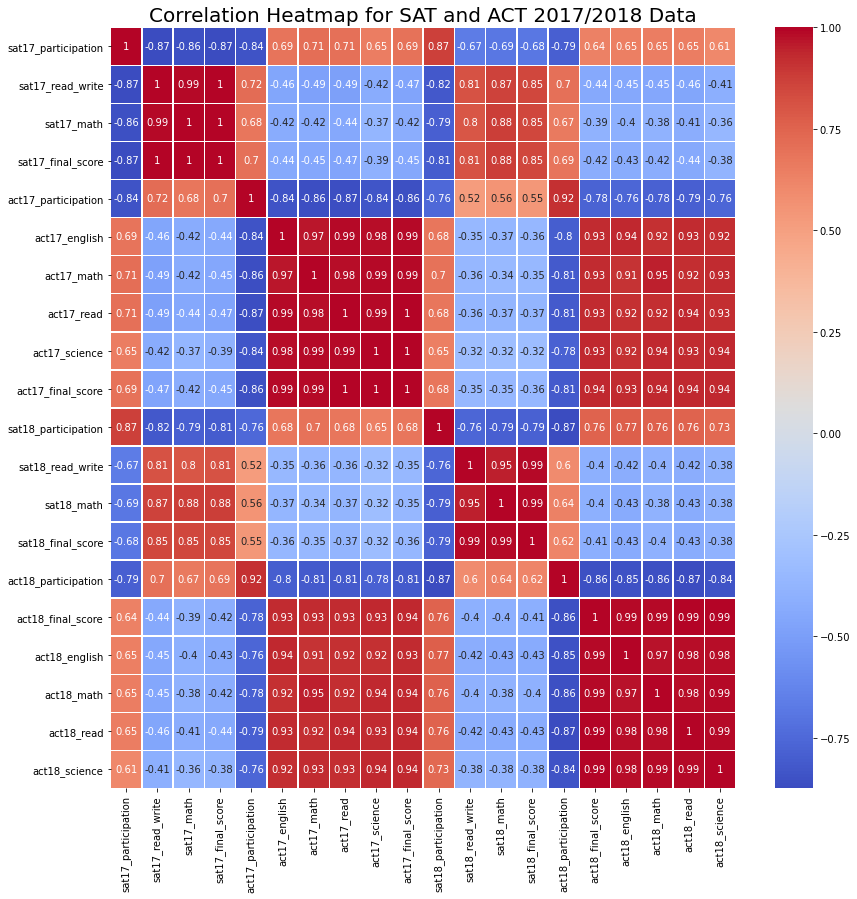

In [66]:
#set size of figure
plt.figure(figsize=(14,14))

#set title of figure
plt.title('Correlation Heatmap for SAT and ACT 2017/2018 Data',fontsize=20)

heatmap = sns.heatmap(final.corr(),annot=True,linewidths = 0.5 , linecolor = 'white', cmap = 'coolwarm')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [67]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In preparation for college admissions, students in the US generally take only one test, and focus their time revising for either the SAT or the ACT [[3]](https://blog.prepscholar.com/act-vs-sat). As such, efforts to increase participation rates for the SAT should be diverted away from states currently with mandatory ACT testings, as they may not be as effective in these states.